In [1]:
%matplotlib inline
import scipy.stats as sp
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import scipy.optimize as so
import scipy.integrate as integrate
import random as rn
import statistics as st

In [2]:
#LCG algorithm

def lcg(a,c,m,xo,ndat,output):
#generate a sample of size ndat with the given parameters
    num=[]
    for n in range(0,ndat):
        xj=((a*xo+c)%m)
        xo=xj
        num.append(xj/m)
    output=num
    return(output)
    
#generator of SystemRandom numbers (sample of size ndat)  
def sysran(ndat,output):
    num=[]
    for n in range(0,ndat):
        num.append(rn.SystemRandom().random())
    output=num
    return(output)
    
 

In [45]:
#this cells serves as an example to create the histograms, the calculations for the report are at the bottom

#set parameters of LCG and significance
xo=343  
ndat=1000000
a=0.05

#create samples
sample1,sample2,sample3=[],[],[]
bins=int(1+3.22*mt.log(ndat))
sample1=lcg(7**5,0,2**31-1,xo,ndat,sample1)
sample2=lcg(7**5,0,2**22-1,xo,ndat,sample2)
sample3=sysran(ndat,sample3)

#create histograms for the chi-quare test
counts_1= np.histogram(sample1,bins)
counts_2= np.histogram(sample2,bins)
counts_3= np.histogram(sample3,bins)
print(bins)

45


Text(0, 0.5, 'Counts')

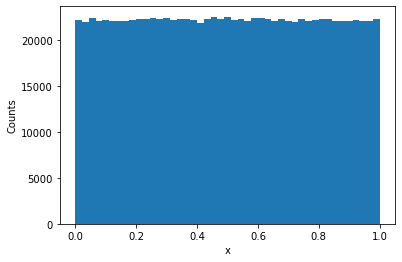

In [46]:
_= plt.hist(sample1,bins)
plt.xlabel("x")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

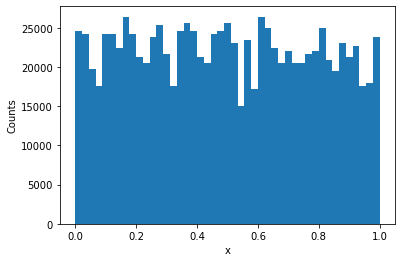

In [47]:
_= plt.hist(sample2,bins)
plt.xlabel("x")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

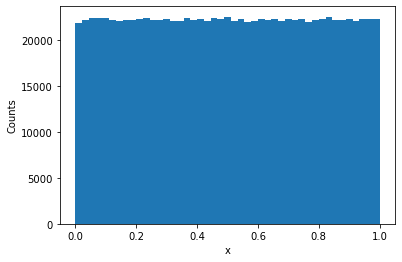

In [48]:
_= plt.hist(sample3,bins)
plt.xlabel("x")
plt.ylabel("Counts")

In [41]:
#CHI-SQUARE TEST

#run the test for a sample of data
def chitest(data,ndata,bins,a):
    #create the "expected" uniform distributon
    exp=ndata/(bins)
    chi=0
    #run the algorithm
    for i in range(0,bins):
        chi=chi+(data[i]-exp)**2/(exp)
    return(chi,sp.chi2.ppf(1-a, bins-1))

print(chitest(counts_1[0],ndat,bins,a))
print(chitest(counts_2[0],ndat,bins,a))
print(chitest(counts_3[0],ndat,bins,a))




(40.57729999999998, 60.480886582336446)
(14607.73862, 60.480886582336446)
(48.55112, 60.480886582336446)


In [42]:
#KOLMOGOROV-SMIRNOV TEST

def ks(data,a):
    n=len(data)
    #first we sort the data
    sort=[]
    for i in range(0,n):
        sort.append(data[i])
    sort.sort()
    
    kpl=[]
    kml=[]
    #run the algorithm
    for i in range(0,n):
        kpl.append(i/n-sort[i])
        kml.append(sort[i]-(i-1)/n)
    kplus=max(kpl)
    kmin=max(kml)
    k=max(mt.sqrt(n)*kplus,mt.sqrt(n)*kmin)
    #calculate critical value
    Q=0
    for j in range(1,100):
        Q=Q+2*(-1)**(j-1)*mt.exp(-2*j**2*a**2)
        
    P=Q*a*(mt.sqrt(ndat)+0.12+0.11/(mt.sqrt(ndat)))   
   
    return(k,P)

print(ks(sample1,a))
print(ks(sample2,a))
print(ks(sample3,a))



(1.0247042423713326, 50.00600550000002)
(20.25778074879181, 50.00600550000002)
(0.9620634924972782, 50.00600550000002)


In [43]:
#RUNS TEST

def run(data,a):
    #calculate median and classify the data in 0's and 1's
    median=st.median(data)
    binlist=[]
    n1,n0,v=0,0,1
    mu,sig=0,0
    #calculate the number of ones and zeros
    for i in range(0,len(data)):
        if(data[i]> median):
            binlist.append(1)
            n1+=1
        if(data[i]< median):
            binlist.append(0)
            n0+=1
    #calculate number of runs
    for i in range(0,len(binlist)-1):
        if(binlist[i+1]!=binlist[i]):
            v=v+1
        else:
            v=v+0
    #calculate critical value
    mu=2*n1*n0/(n1+n0)+1
    sig=mt.sqrt(2*n1*n0*(2*n1*n0-n1-n0)/((n1+n0)**2*(n1+n0-1)))
    if (v>=mu):
        k=-0.5
    if (v<mu):
        k=0.5
    z=(v+k-mu)/sig
    p=-sp.norm.ppf(a)   
    return(abs(z),p)

print(run(sample1,a))
print(run(sample2,a))
print(run(sample3,a))


(0.027000013500023626, 1.6448536269514729)
(18.758315251696533, 1.6448536269514729)
(1.945000972501702, 1.6448536269514729)


In [ ]:
#REVERSE ARRANGEMENTS TEST


def reverse(data,s):
    alist=[]
    n=len(data)
    a=0
    #run arrangements algorithm
    for i in range(0,n-1):
        for j in range(i+1,n):
            if(data[i]>data[j]):
                a+=1
    #calculate critical value
    mu=n*(n-1)/4
    sig=mt.sqrt(n*(2*n-1)*(n-1)/72)
    z=(a-mu)/sig
    p=-sp.norm.ppf(s)  
    return(abs(z),p)






In [44]:

#here we run all the tests at once for the three samples and different number of elements
k=7
a=0.05
xo=343
for n in range(2,k):
    print(n)
    ndat=10**n
    sample1,sample2,sample3=[],[],[]
    bins=int(1+3.22*mt.log(ndat))
    sample1=lcg(7**5,0,2**31-1,xo,ndat,sample1)
    sample2=lcg(7**5,0,2**22-1,xo,ndat,sample2)
    sample3=sysran(ndat,sample3)
    
    counts_1= np.histogram(sample1,bins)
    counts_2= np.histogram(sample2,bins)
    counts_3= np.histogram(sample3,bins)
    print("NDAT=",ndat)
    print("chi_1:=",chitest(counts_1[0],ndat,bins,a))
    print("chi_2:=",chitest(counts_2[0],ndat,bins,a))
    print("chi_3:=",chitest(counts_3[0],ndat,bins,a))
    print()
    print("ks_1:=",ks(sample1,a))
    print("ks_2:=",ks(sample2,a))
    print("ks_3:=",ks(sample3,a))
    print()
    print("runs_1:=",run(sample1,a))
    print("runs_2:=",run(sample2,a))
    print("runs_3:=",run(sample3,a))
    print()
    #we don't run the arrangements test for more that 10^5 numbers because it's too slow
    if(n<=5):
        print("reverse_1:=",reverse(sample1,a))
        print("reverse_2:=",reverse(sample2,a))
        print("reverse_3:=",reverse(sample3,a))        
    print() 
    print() 


2
NDAT= 100
chi_1:= (9.799999999999999, 23.684791304840576)
chi_2:= (13.399999999999999, 23.684791304840576)
chi_3:= (11.9, 23.684791304840576)

ks_1:= (0.630047502568945, 0.5065500000000002)
ks_2:= (0.7143780504174346, 0.5065500000000002)
ks_3:= (1.0385774504430718, 0.5065500000000002)

runs_1:= (1.7086514553642496, 1.6448536269514729)
runs_2:= (1.3066158188079555, 1.6448536269514729)
runs_3:= (0.1005089091390735, 1.6448536269514729)

reverse_1:= (0.6468534374764877, 1.6448536269514729, 2368)
reverse_2:= (0.09672574766003555, 1.6448536269514729, 2459)
reverse_3:= (1.444840855671781, 1.6448536269514729, 2714)


3
NDAT= 1000
chi_1:= (16.002000000000002, 33.92443847144381)
chi_2:= (14.622, 33.92443847144381)
chi_3:= (24.144000000000005, 33.92443847144381)

ks_1:= (0.7767929152015093, 1.5873127553554995)
ks_2:= (0.8474380257463876, 1.5873127553554995)
ks_3:= (0.7302952641537621, 1.5873127553554995)

runs_1:= (0.854242624154194, 1.6448536269514729)
runs_2:= (1.7401238640178027, 1.644853626

In [ ]:
xo=100
for i in range(0,1000):
    xo=xo+1
    ndat=10000
    sample1,sample2,sample3=[],[],[]
    sample2=lcg(7**5,0,2**22-1,xo,ndat,sample2)
    x=reverse(sample2,a)[0]
    print("reverse_2:=",x)
    if(x>a+1):
        print("STOP")
        break

    
    

In [ ]:
for x in range(1,10):
    print(x*10)
    break

In [34]:
print(2)

2
